In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2021-10-08 15:26:59.842176


<h1>Luokiteltu jakauma</h1>

Määrällisen muuttujan jakaumaan tutustun luokitellun jakauman avulla. Luokitellun jakauman voin esittää frekvenssitaulukkona tai histogrammina.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Datan avaaminen
df = pd.read_excel('https://taanila.fi/data1.xlsx')
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [4]:
# Määrittelen luokkarajat palkan luokittelemiseksi 
# Vaihtoehtoisesti voin antaa luokkien lukumäärän
bins = [1000, 2000, 3000, 4000, 7000]

# Lisään dataan palkkaluokka-sarakkeen
# bins-parametrin arvoksi annan yllä määritellyn bins-nimisen listan
df['palkkaluokka'] = pd.cut(df['palkka'], bins = bins)

# Datassa on nyt viimeisimpänä muuttujana palkkaluokka
df.head()

,nro,sukup,ikä,perhe,koulutus,palveluv,palkka,johto,työtov,työymp,palkkat,työteht,työterv,lomaosa,kuntosa,hieroja,palkkaluokka
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN,"(3000, 4000]"
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN,"(2000, 3000]"
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN,"(1000, 2000]"
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN,"(2000, 3000]"
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN,"(2000, 3000]"


In [5]:
# Palkkaluokkiin kuuluvien lukumäärät
df1 = pd.crosstab(df['palkkaluokka'], 'Lukumäärä')

# Häiritsevän otsikon poistaminen
df1.columns.name = ''

# Prosentit
n = df1['Lukumäärä'].sum()
df1['%'] = df1 / n * 100

# Yhteensä-rivin lisäämiseksi indeksin luokkaväliarvot on ensin muuutettava merkkijonoiksi,
# koska dataframen sarake saa sisältää vain yhden tyyppistä tietoa!
# Uusimmissa versioissa tämä vaihe ei ole välttämätön
df1.index = df1.index.astype(str)

# Yhteensä-rivi
df1.loc['Yhteensä'] = df1.sum()

# Taulukon näyttäminen siten että lukumäärissä ei desimaaleja, mutta prosenteissa yksi desimaali
df1.style.format({'Lukumäärä': '{:.0f}', '%': '{:.1f} %'})

,Lukumäärä,%
palkkaluokka,,
"(1000, 2000]",19,23.2 %
"(2000, 3000]",50,61.0 %
"(3000, 4000]",8,9.8 %
"(4000, 7000]",5,6.1 %
Yhteensä,82,100.0 %


<h2>Histogrammi</h2>

Histogrammi on nopein keino luokitellun jakauman tarkasteluun. Histogrammia varten ei tarvitse erikseen laskea luokiteltua jakaumaa taulukkona.

<b>Tärkeä huomautus! </b>Oletuksena <b>cut</b>-funktion tuottamat luokat eivät sisällä luokan alarajaa, mutta sisältävät luokan ylärajan. Histogrammissa taas luokat sisältävät luokkien alarajat, mutta eivät sisällä luokan ylärajaa viimeistä luokkaa lukuun ottamatta. Jos havaintoja on juuri luokkarajojen kohdalla, niin cut-funktion tuottamien luokkien frekvenssit poikkeavat histogrammin pylväiden näyttämistä frekvensseistä.

Text(0, 0.5, 'Lukumäärä, n = 82')

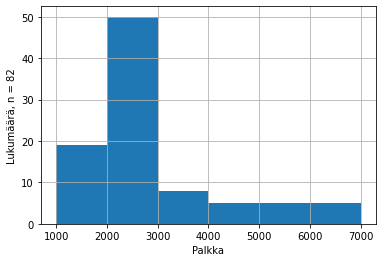

In [6]:
# Käytän edellä määriteltyjä luokkarajoja (bins)
df['palkka'].hist(bins = bins)

# Havaintojen lukumäärä
n = df['palkka'].count()

plt.xlabel('Palkka')
plt.ylabel('Lukumäärä, n = ' + str(n))

Text(0, 0.5, '%, n = 82')

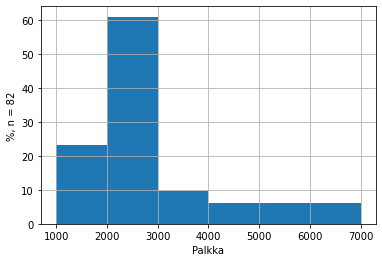

In [7]:
# np.ones kikalla prosentit hist-kaavioon
# np.ones kikka tuottaa painokertoimiksi 1/n

# Havaintojen lukumäärä
n = df['palkka'].count()

# Histogrammi, jossa y-akselilla prosentit
df['palkka'].hist(bins = bins, weights = np.ones(n) / n * 100)

plt.xlabel('Palkka')
plt.ylabel('%, n = ' + str(n))

Text(0, 0.5, '%, n = 82')

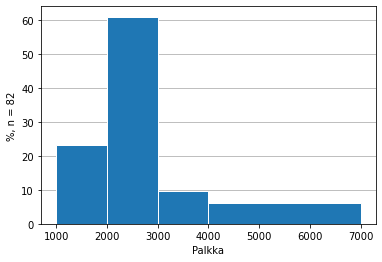

In [8]:
# Tässä vielä sama muutamalla lisämuotoilulla

n = df['palkka'].count()

df['palkka'].hist(bins = bins, weights = np.ones(n) / n * 100,
                 zorder = 2, edgecolor = 'white')

plt.grid(axis = 'x')
plt.xlabel('Palkka')
plt.ylabel('%, n = ' + str(n))

<h2>Lisätietoa</h2>


- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html
- https://numpy.org/doc/stable/reference/generated/numpy.ones.html
    
Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/

In [10]:
# Tämän notebookin suoritukseen käyttämäni pandas-versio oheiskirjastoineen
pd.show_versions()


INSTALLED VERSIONS
------------------
commit           : 73c68257545b5f8530b7044f56647bd2db92e2ba
python           : 3.9.7.final.0
python-bits      : 64
OS               : Windows
OS-release       : 10
Version          : 10.0.19041
machine          : AMD64
processor        : Intel64 Family 6 Model 158 Stepping 10, GenuineIntel
byteorder        : little
LC_ALL           : None
LANG             : None
LOCALE           : Finnish_Finland.1252

pandas           : 1.3.3
numpy            : 1.20.3
pytz             : 2021.1
dateutil         : 2.8.2
pip              : 21.2.4
setuptools       : 58.0.4
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : 3.0.1
lxml.etree       : 4.6.3
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.0.1
IPython          : 7.27.0
pandas_datareader: 0.10.0
bs4              : None
bottleneck       : 1.3.2
fsspec   